In [96]:
pwd #Where i nead to place my dataset to find it

'C:\\Users\\46705'

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

df=pd.read_csv("Loan_Train.csv") #finding the dataset
df #typing out the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [159]:
print(df.isnull().sum()) #looking for missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64


In [153]:
imputer = SimpleImputer(strategy='mean')
df.fillna(df.mean(), inplace=True)

C:\Users\46705\AppData\Local\Temp\ipykernel_20628\4004048182.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [154]:
df.dropna(inplace=True) #Droping the rows that have a missing values

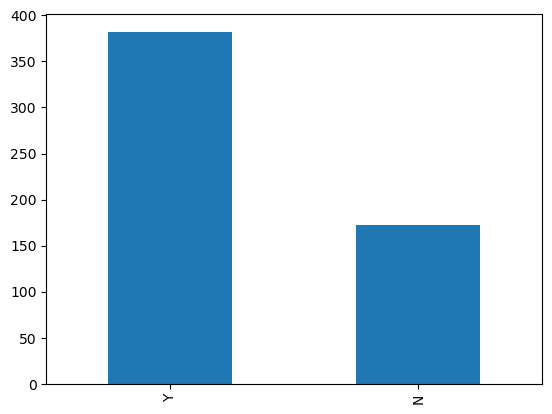

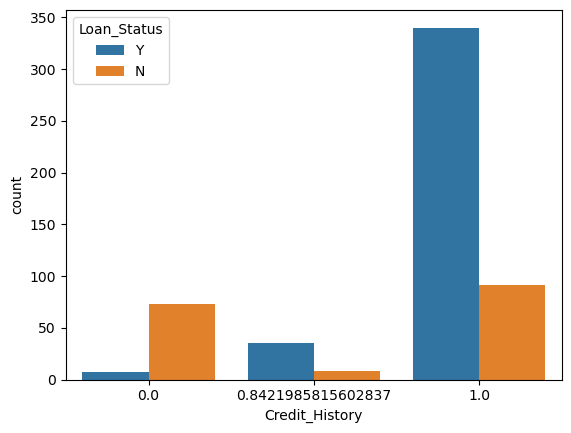

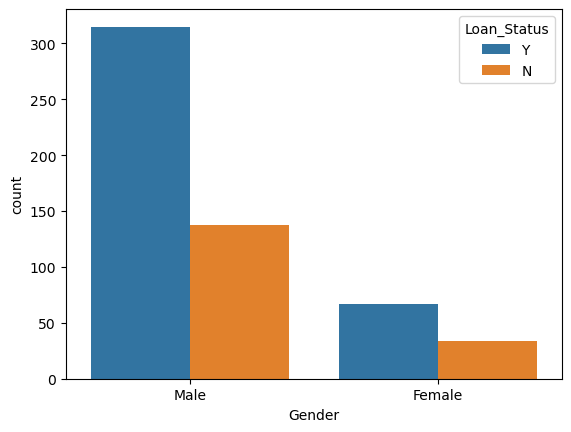

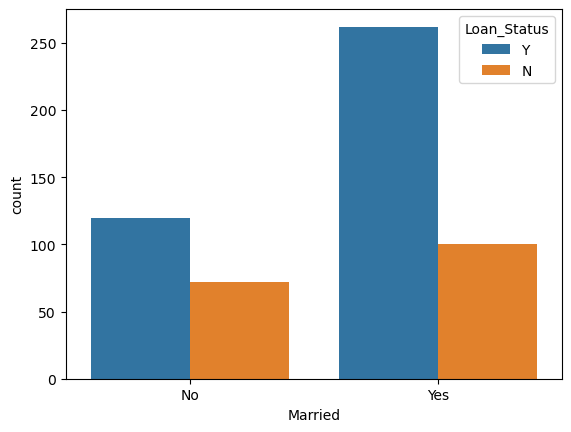

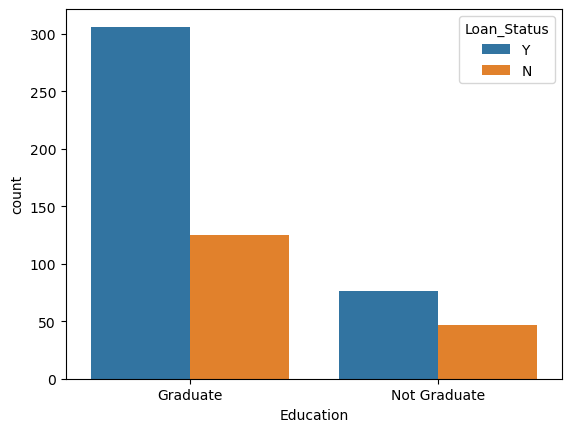

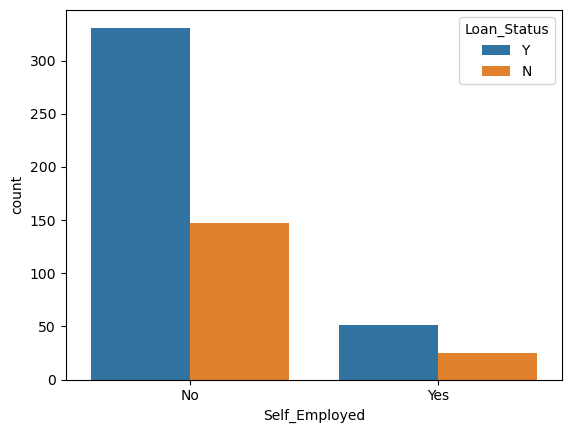

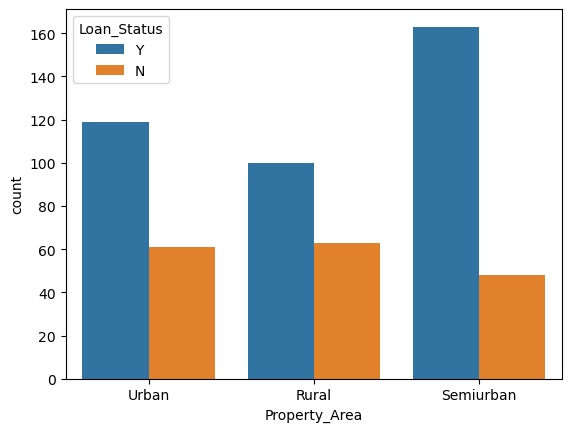

In [155]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'])
plt.show()

sns.countplot(x=df['Gender'], hue=df['Loan_Status'])
plt.show()

sns.countplot(x=df['Married'], hue=df['Loan_Status'])
plt.show()

sns.countplot(x=df['Education'], hue=df['Loan_Status'])
plt.show()

sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'])
plt.show()

sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'])
plt.show()

#the blue means how many loans that got approved and orange how many that did not in all but the first one

In [156]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Amount_Term'] = df['LoanAmount'] / df['Loan_Amount_Term'] #a example of feature enginering in this

In [160]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'] #creating a grid
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X, y) #creating a decision tree that is looking into the grid

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Best score:  0.8062108489937359
